In [ ]:
!pip install keras
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=f9d642e91bc43a2458ccd9eb92e344a8c8a010203752c5c54235cf8a2cca88ad
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:

import os
import pathlib
from matplotlib import animation

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.io as sio
from matplotlib import pyplot
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras import models
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import time
from scipy import stats
from tensorflow.python.keras.utils.np_utils import to_categorical

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data=sio.loadmat('/content/drive/MyDrive/Dataset/MNIST/MNIST_database_train.mat')
image_train=train_data['images']
label_train=train_data['labels']
x_train, x_validate, y_train, y_validate = train_test_split(image_train,label_train, test_size = 0.20,shuffle=False)
y_train=to_categorical(y_train, num_classes=10)
y_validate=to_categorical(y_validate, num_classes=10)

In [ ]:
y_train.shape

(48000, 10)

In [ ]:

x_train=np.reshape(x_train,[x_train.shape[0],28,28,1])
x_validate=np.reshape(x_validate,[x_validate.shape[0],28,28,1])

'''
y_train=tf.keras.utils.to_categorical(y_train)
y_validate=tf.keras.utils.to_categorical(y_validate)
'''

'\ny_train=tf.keras.utils.to_categorical(y_train)\ny_validate=tf.keras.utils.to_categorical(y_validate)\n'

In [ ]:
y_train.shape

(48000, 10)

In [ ]:


model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=1,kernel_size=[3, 3],activation='relu', input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(10,activation='softmax', input_shape=(24,)))
model.build()
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,  loss=tf.keras.losses.CategoricalCrossentropy ())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6780 (26.48 KB)
Trainable params: 6780 (26.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
1500/1500 - 12s - loss: 0.6207 - val_loss: 0.3305 - 12s/epoch - 8ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 - 8s - loss: 0.3410 - val_loss: 0.3105 - 8s/epoch - 6ms/step
Epoch 3/100
1500/1500 - 5s - loss: 0.3219 - val_loss: 0.2989 - 5s/epoch - 3ms/step
Epoch 4/100
1500/1500 - 4s - loss: 0.3131 - val_loss: 0.2888 - 4s/epoch - 2ms/step
Epoch 5/100
1500/1500 - 4s - loss: 0.3058 - val_loss: 0.2871 - 4s/epoch - 3ms/step
Epoch 6/100
1500/1500 - 4s - loss: 0.3020 - val_loss: 0.2834 - 4s/epoch - 3ms/step
Epoch 7/100
1500/1500 - 4s - loss: 0.2977 - val_loss: 0.2803 - 4s/epoch - 2ms/step
Epoch 8/100
1500/1500 - 4s - loss: 0.2953 - val_loss: 0.2901 - 4s/epoch - 2ms/step
Epoch 9/100
1500/1500 - 5s - loss: 0.2919 - val_loss: 0.2764 - 5s/epoch - 3ms/step
Epoch 10/100
1500/1500 - 4s - loss: 0.2895 - val_loss: 0.2779 - 4s/epoch - 2ms/step
Epoch 11/100
1500/1500 - 4s - loss: 0.2872 - val_loss: 0.2913 - 4s/epoch - 2ms/step
Epoch 12/100
1500/1500 - 5s - loss: 0.2863 - val_loss: 0.2769 - 5s/epoch - 3ms/step
Epoch 13/100
1500/1500 - 4s - loss: 0.2846 - val_loss: 0.2789 - 4s/epoch - 3ms/step
Epoch 14/100

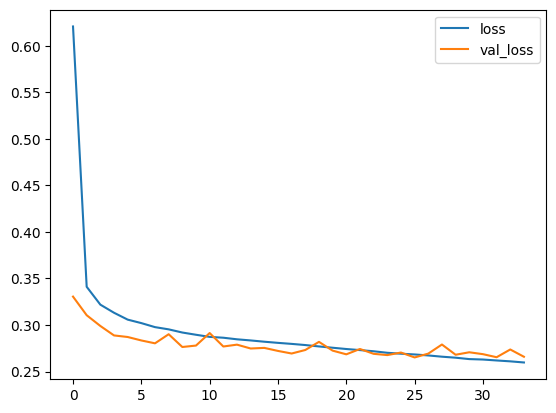

In [ ]:
EPOCHS =100
callbacks = [EarlyStopping(monitor='val_loss', patience=8), ModelCheckpoint(filepath='./best_model.h5', monitor='val_loss', save_best_only=True)]# uses validation set to stop training when it start overfitting
history = model.fit(x_train,y_train,validation_data=(x_validate,y_validate),callbacks=callbacks,epochs=EPOCHS,batch_size=32, verbose=2, shuffle=True)
model=keras.models.load_model('./best_model.h5')
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()






In [ ]:
test_data=sio.loadmat('/content/drive/MyDrive/Dataset/MNIST/MNIST_database_test.mat')
image_test=test_data['images']
image_test=np.reshape(image_test,[image_test.shape[0],28,28,1])

label_test=np.reshape(test_data['labels'],[-1,])
label_predict=np.argmax(model.predict(image_test,batch_size=1),axis=0)
accuracy=0
'''
for i in range(0,1000):
    accuracy+= (label_predict[i] == label_test[i])
print('Percentage Accuracy')
print(accuracy*100/10)
'''
model.summary()

Layer1_weights=model.get_weights()[0]
Layer1_bias=model.get_weights()[1]


Model_para_inputs = {"Layer1_weights":Layer1_weights,"Layer1_bias":Layer1_bias,"image_test":image_test,"label_test":label_test,"label_predict":label_predict}
sio.savemat('./Model_para_inputs.mat',Model_para_inputs)

10000/10000 [==============================] - 20s 2ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 1)         10        
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6780 (26.48 KB)
Trainable params: 6780 (26.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
